## Palmer Penguin Analysis

Create an accurate model that predicts the penguin species based on several explantory variables.

In [95]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

### Initial Data Analysis

The Palmer Penguins datset is distributed through the Python library [palmerpenguins](https://github.com/mcnakhaee/palmerpenguins). This dataset was originally collected near Palmer Station in Antartica.

In [96]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [97]:
str(penguins.shape[0]) + " rows"

'344 rows'

In [98]:
str(penguins.shape[1]) + " columns"

'8 columns'

In [99]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [100]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### Data Visuals and Analysis

Looking at each explanatory variable to find outliers or absurd patterns.

#### Numerical Variables

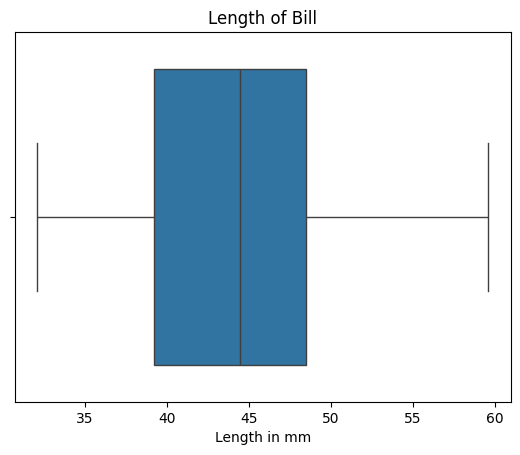

In [101]:
sns.boxplot(x = penguins["bill_length_mm"])
plt.title("Length of Bill")
plt.xlabel("Length in mm")
plt.show()

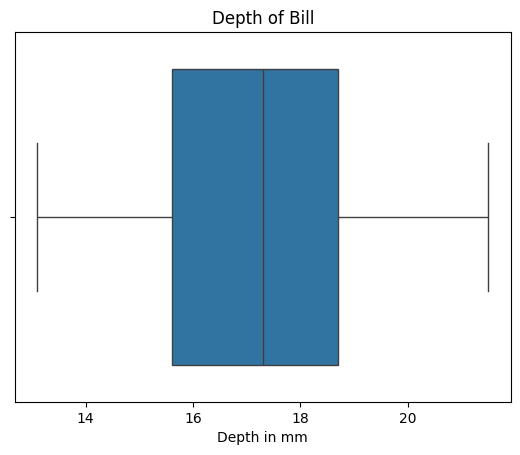

In [102]:
sns.boxplot(x = penguins["bill_depth_mm"])
plt.title("Depth of Bill")
plt.xlabel("Depth in mm")
plt.show()

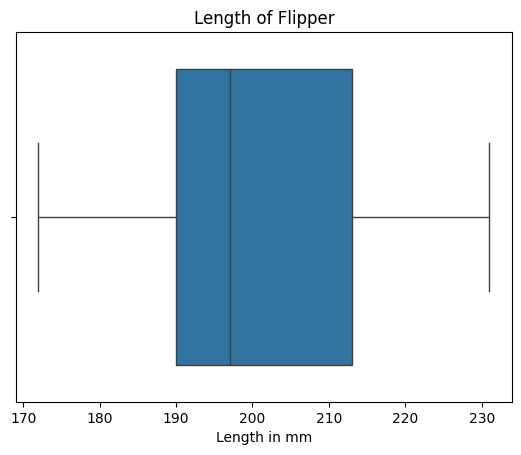

In [103]:
sns.boxplot(x = penguins["flipper_length_mm"])
plt.title("Length of Flipper")
plt.xlabel("Length in mm")
plt.show()

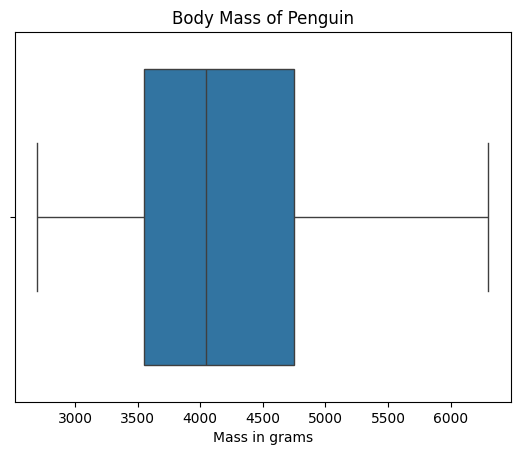

In [104]:
sns.boxplot(x = penguins["body_mass_g"])
plt.title("Body Mass of Penguin")
plt.xlabel("Mass in grams")
plt.show()

As seen above, there is no outliers amongst the needed numerical variables.

#### Categorical Variables Cleaning

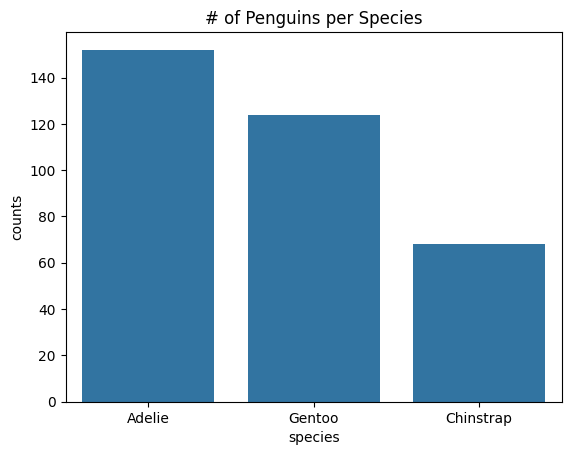

In [105]:
species_count = penguins["species"].value_counts()
sns.barplot(x = species_count.index, y = species_count)
plt.ylabel("counts")
plt.title("# of Penguins per Species")
plt.show()

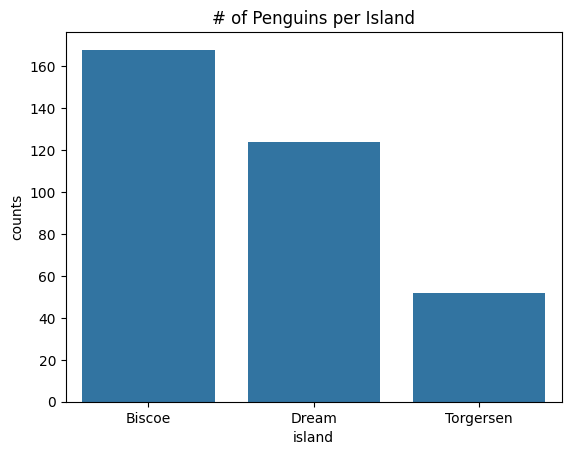

In [106]:
islands_count = penguins["island"].value_counts()
sns.barplot(x = islands_count.index, y = islands_count)
plt.ylabel("counts")
plt.title("# of Penguins per Island")
plt.show()

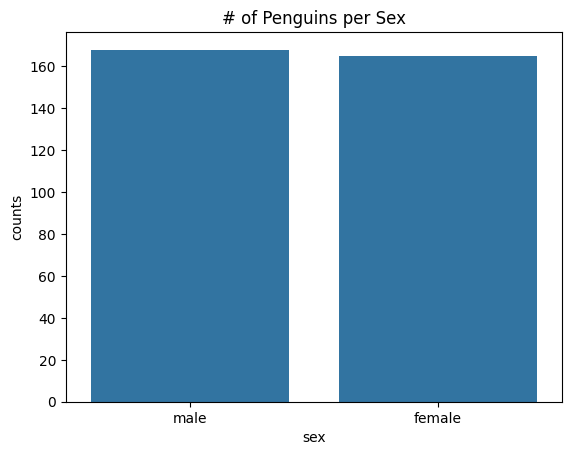

In [107]:
sex_count = penguins["sex"].value_counts()
sns.barplot(x = sex_count.index, y = sex_count)
plt.ylabel("counts")
plt.title("# of Penguins per Sex")
plt.show()

#### Interactions among multiple variables

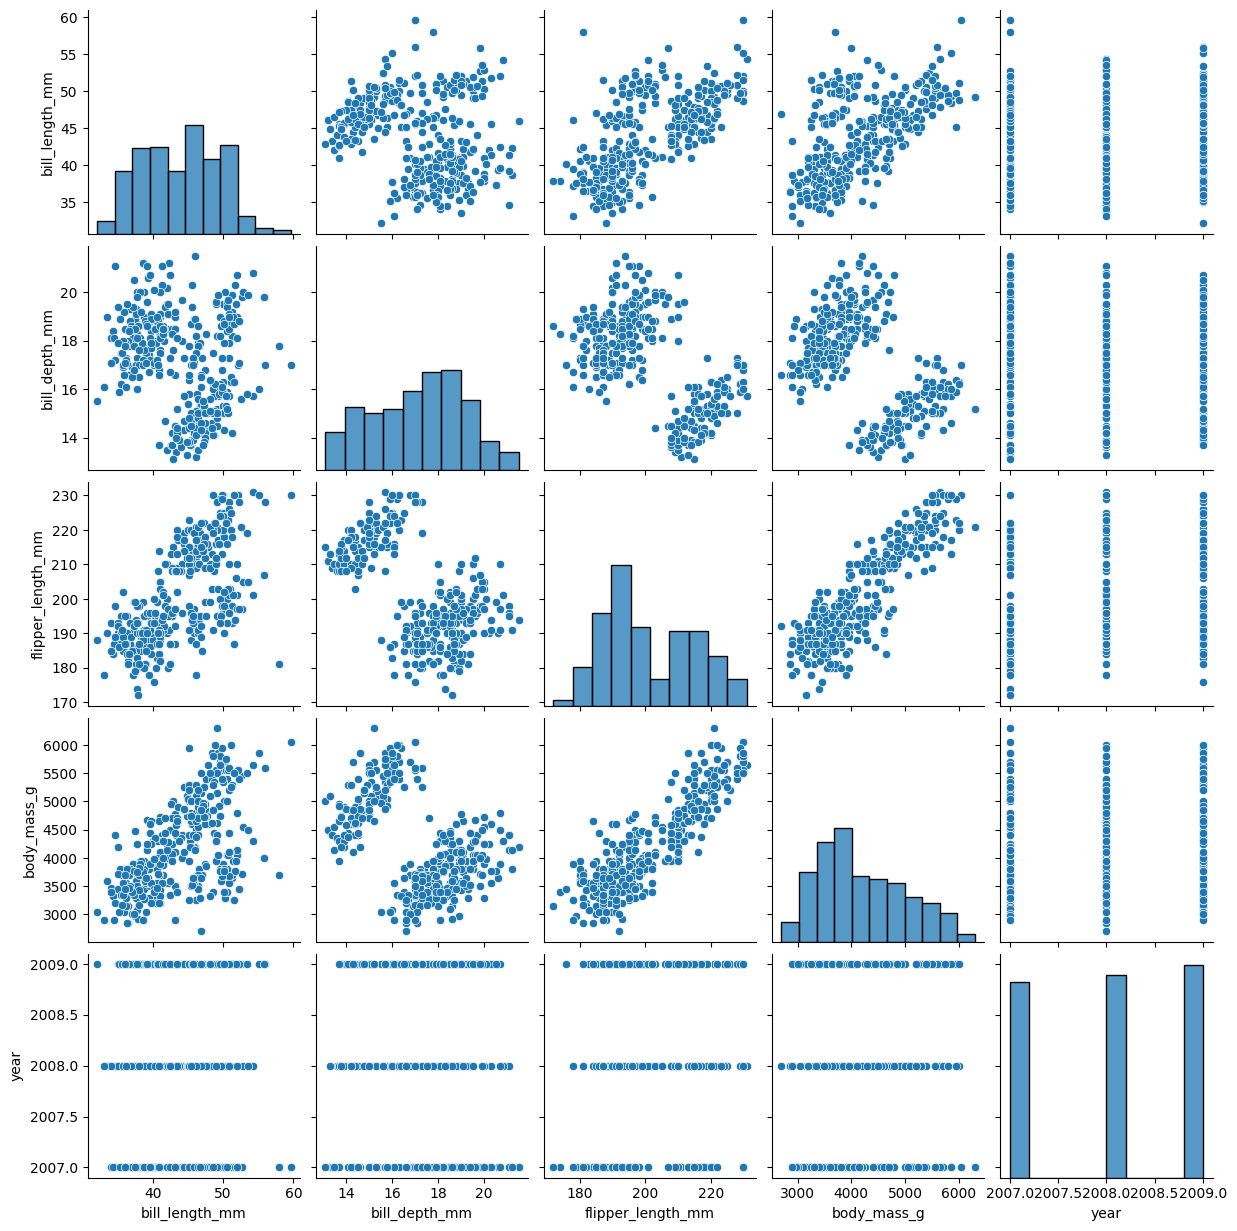

In [108]:
sns.pairplot(penguins)

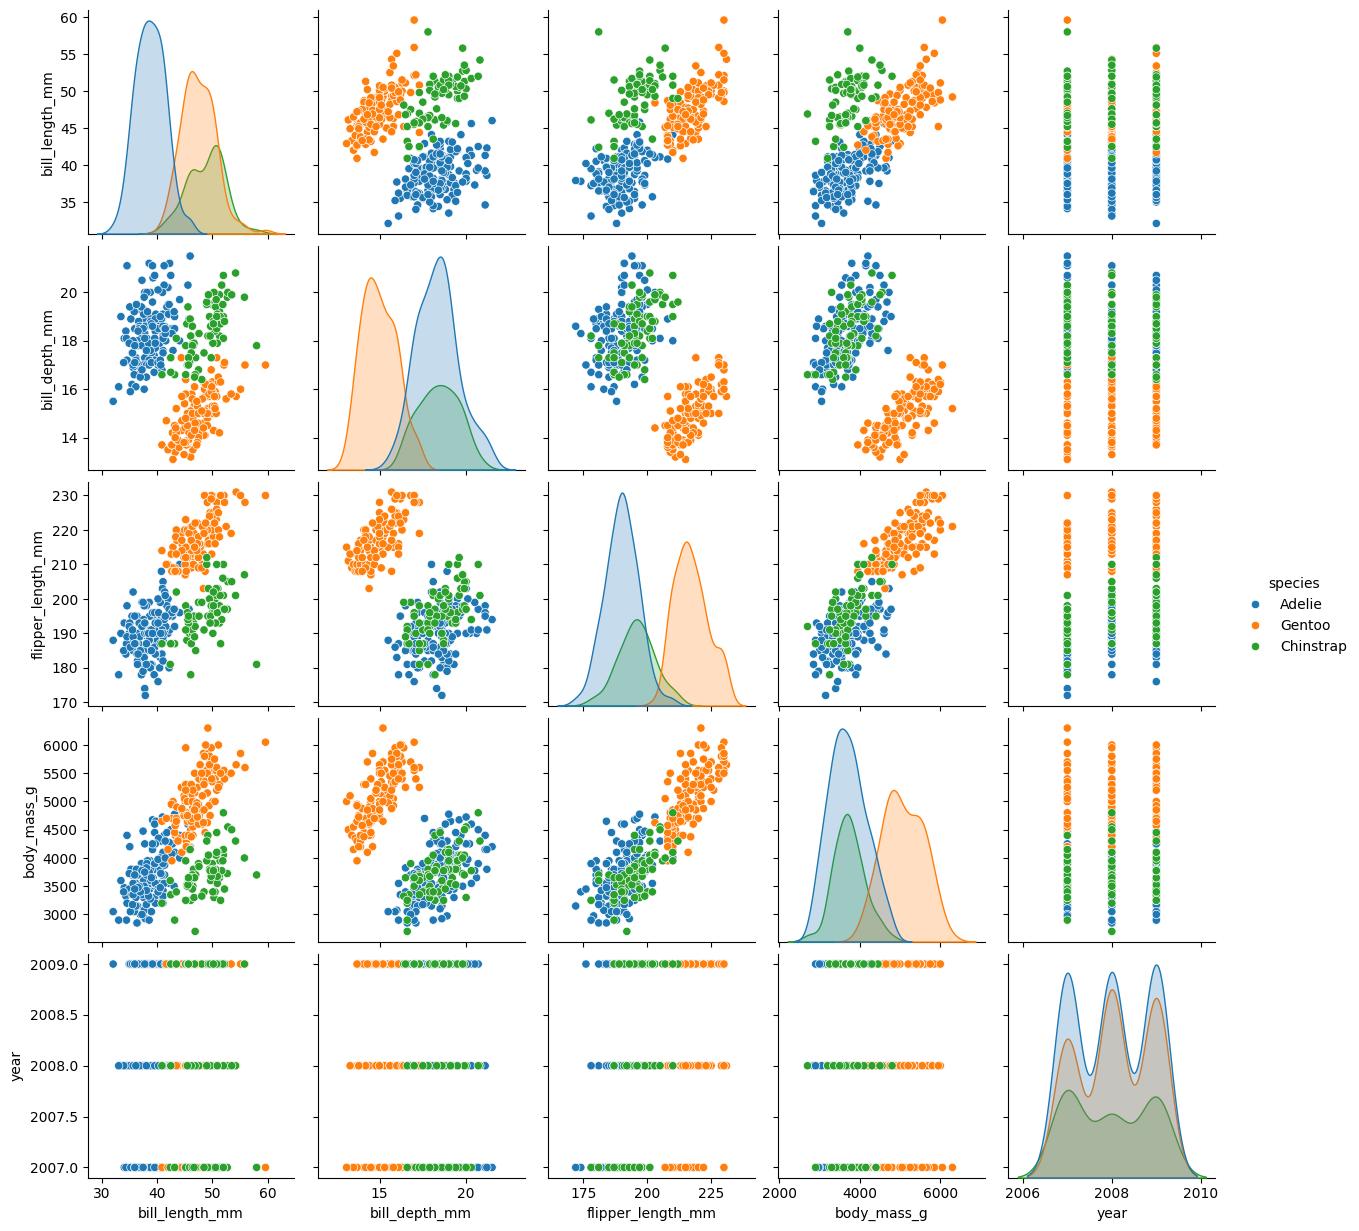

In [109]:
sns.pairplot(penguins, hue = "species")

### Data Cleaning Measures

Firstly, we need to check if there is any NaN values within the dataset.

In [110]:
penguins.isna().sum(axis = 0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Since there is a couple of NaN values, we will drop them. Though dropping rows makes the data no longer representative of the original data, it is best we remove them since we want to create the best model that accurately predicts penguins based on several factors.

In [111]:
dropped_penguins = penguins.dropna()
dropped_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Since we have cleared all our explicit missing values, it is time to check if any of our variables have implict missing values.

In [112]:
dropped_penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

Note that each columns/variable has the correct type. Therefore, we can conclude there is no implicit missing values. Note below that since we are not basing our model on the use of the year column, we will remove the year column. /*clean_penguins*/ is the final cleaned dataframe that we will be using to build our model.

In [113]:
clean_penguins = dropped_penguins.drop(columns="year")
clean_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## Dataset Training and Setup

Since Scikit-Learn doesn't support categorical variables, we would have to convert our catgeorical variables into numerical labels.

In [114]:
final_penguins = pd.get_dummies(clean_penguins)
final_penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,False,True,False,False,True,False,False,True


In [124]:
#["species_Adelie", "species_Chinstrap", "species_Gentoo"]
feat_mat = clean_penguins.drop(columns= "species", axis = 1)
feat_mat

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,male
1,Torgersen,39.5,17.4,186.0,3800.0,female
2,Torgersen,40.3,18.0,195.0,3250.0,female
4,Torgersen,36.7,19.3,193.0,3450.0,female
5,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
339,Dream,55.8,19.8,207.0,4000.0,male
340,Dream,43.5,18.1,202.0,3400.0,female
341,Dream,49.6,18.2,193.0,3775.0,male
342,Dream,50.8,19.0,210.0,4100.0,male


In [127]:
tar_arr = clean_penguins["species"]
tar_arr

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object